In [2]:
from sklearn.datasets import fetch_openml
import time
import numpy as np
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt 

In [3]:
with np.load('mnist.npz') as data:
    xx = data['x_train']
    yy = data['y_train']

xx = xx.reshape(-1, 784) / 255. 
yy = yy.astype(np.int64)

m = xx.shape[0]
n = xx.shape[1] + 1

X = np.concatenate((np.ones([m,1]),xx), axis=1)  

cat = np.zeros([m,10])
for ind, num in enumerate(yy):
    cat[ind][num] = 1
Y = cat


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)


In [5]:
print(f'- X original: {X.shape[0]} x {X.shape[1]}')
print(f'- Y original: {Y.shape[0]} x {Y.shape[1]}')
print(f'- X Train: {x_train.shape[0]} x {x_train.shape[1]}')
print(f'- Y train: {y_train.shape[0]} x {y_train.shape[1]}')
print(f'- X Test: {x_test.shape[0]} x {x_test.shape[1]}')
print(f'- Y Test: {y_test.shape[0]} x {y_test.shape[1]}')

- X original: 60000 x 785
- Y original: 60000 x 10
- X Train: 51000 x 785
- Y train: 51000 x 10
- X Test: 9000 x 785
- Y Test: 9000 x 10


9


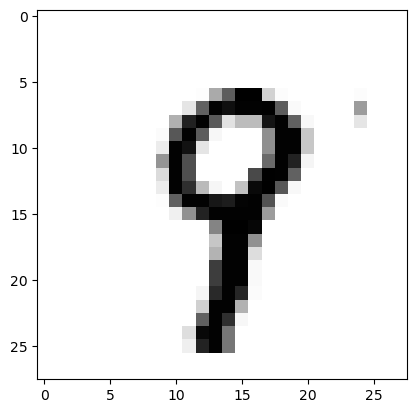

In [6]:
NumSample = np.random.randint(0,59500)
plt.imshow(np.reshape(x_train[NumSample][1:], [28,28]), cmap='Greys')
print(np.argmax(y_train[NumSample]))

In [4]:
dg1=1
dg2=2
num12 = sum(Y[:,dg1]) + sum(Y[:,dg2])
Y1 = Y[:,dg1];
Y2 = Y[:,dg2];
indx1 = np.where(Y1==1)[0];
indx2 = np.where(Y2==1)[0];

indx12 = np.concatenate((indx1,indx2))

X12 = X[indx12,1:]
Y12 = np.ones(len(indx12))
Y12[len(indx1):] =-1

print(X12)
print(Y12)

xdual_train, xdual_test, ydual_train, ydual_test = train_test_split(X12, Y12, test_size = 0.15, random_state=24)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ 1.  1.  1. ... -1. -1. -1.]


In [4]:
N = xdual_train.shape[0]
A = np.zeros((N, N))

for i in range(N):
    for j in range(i, N): # from i to N
        A[i, j] = np.dot(xdual_train[i, :] * ydual_train[i], xdual_train[j, :] * ydual_train[j])


M = np.zeros((N-1, N-1))

for j in range(N-1):
    for i in range(N-1):
        M[j, i] = A[i, j] + A[0, 0] * ydual_train[i] * ydual_train[j] / ydual_train[0]**2 - A[0, j] * ydual_train[i] / ydual_train[0]




In [6]:
alphas = np.linalg.solve(M, np.ones((N-1, 1)))

alphas = np.vstack((-np.sum(alphas), alphas))

w = np.sum(alphas * ydual_train[:, None] * xdual_train, axis = 0)

S = (alphas > 1e-4).flatten()
b = ydual_train[S] - np.dot(xdual_train[S], w)

b = np.mean(b)

print('Alphas: ', alphas[S])
print('w: ', w)
print('b: ', b)


Alphas:  [[0.01293642]
 [0.01110568]
 [0.01958189]
 ...
 [0.00430926]
 [0.0052194 ]
 [0.00232832]]
w:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.

In [7]:
predictions = np.sign(np.dot(xdual_test, w) + b)

accuracy = np.mean(predictions == ydual_test)

print('Accuracy: ', accuracy)


Accuracy:  0.4004400440044004
